In [8]:
import pandas as pd
import numpy as np
ad = pd.read_csv(r"C:\Users\MONSTER\Desktop\Walmart_sales.csv")
df = ad.copy()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [13]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [14]:
#Is there a correlation between the consumer price index and unemployment?

In [15]:
df["Temperature"].median()

62.67

In [16]:
df.isnull().values.any()

False

In [17]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


C:\Users\MONSTER\emirturker\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


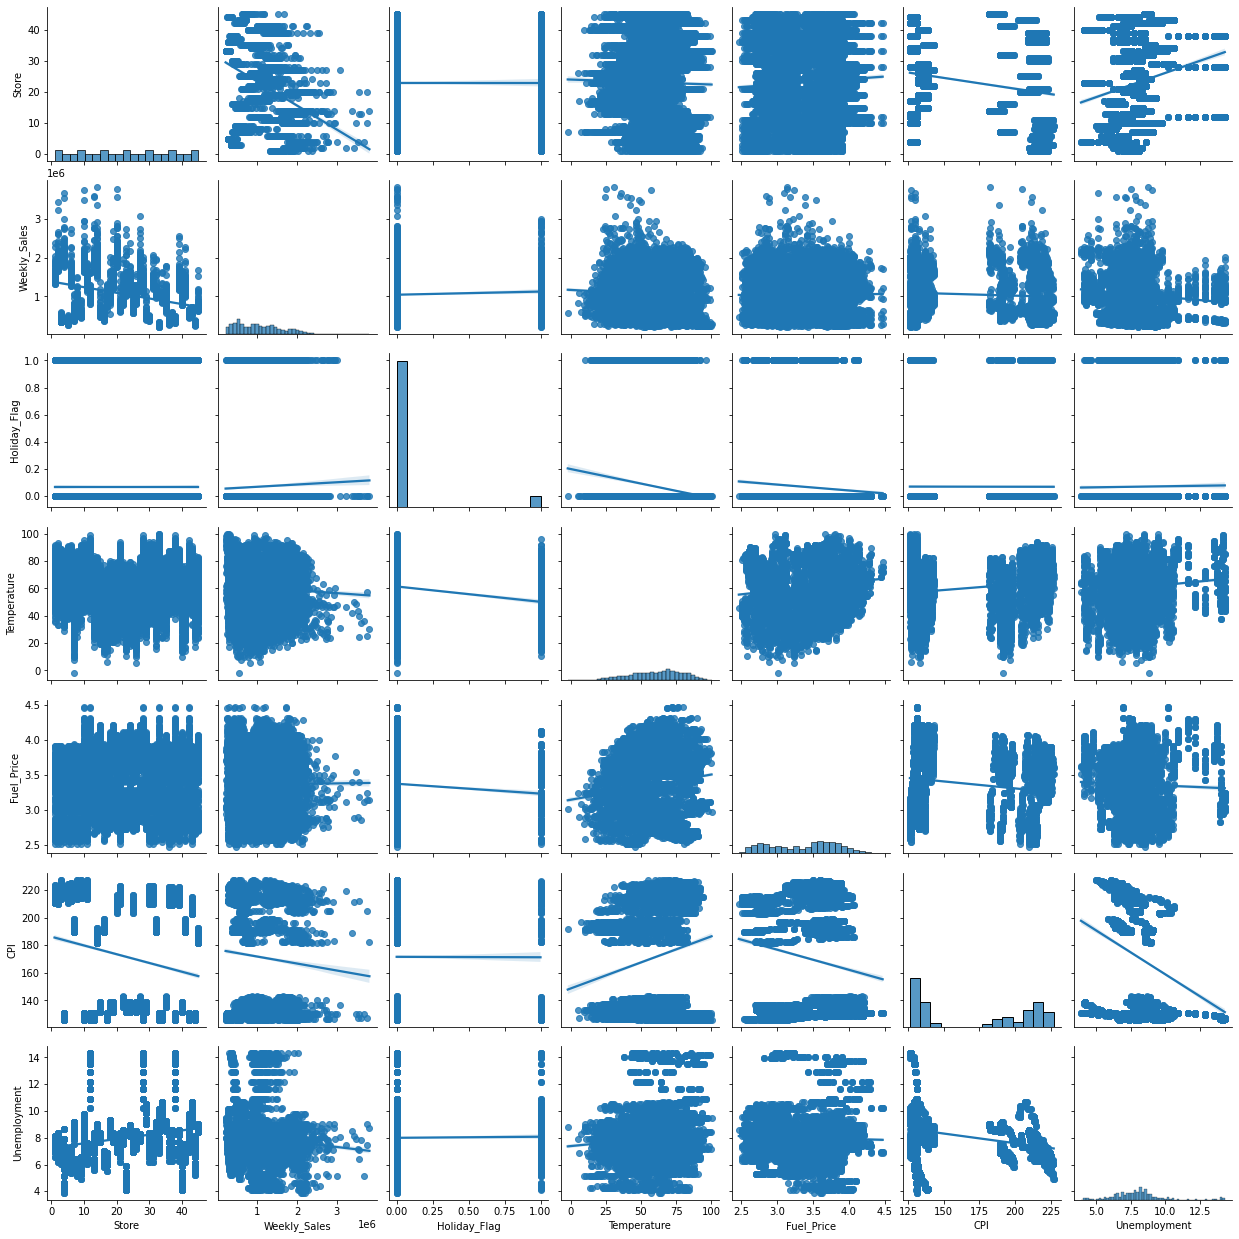

In [18]:
import seaborn as sns
sns.pairplot(df, kind = "reg");

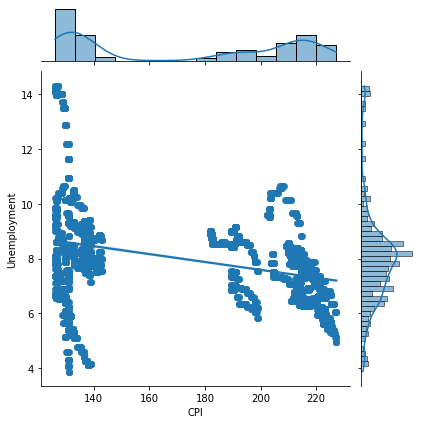

In [20]:
sns.jointplot(x = "CPI", y = "Unemployment", data = df, kind = "reg");

In [21]:
import statsmodels.api as sm;
X = df["CPI"]
X[0:5]

0    211.096358
1    211.242170
2    211.289143
3    211.319643
4    211.350143
Name: CPI, dtype: float64

In [22]:
X = sm.add_constant(X)

In [23]:
X[0:5]

,const,CPI
0,1.0,211.096358
1,1.0,211.242170
2,1.0,211.289143
3,1.0,211.319643
4,1.0,211.350143


In [24]:
y = df["Unemployment"]

In [25]:
y[0:5]

0    8.106
1    8.106
2    8.106
3    8.106
4    8.106
Name: Unemployment, dtype: float64

In [26]:
lm = sm.OLS(y, X)

In [27]:
model = lm.fit()

In [ ]:
#Some test statistics

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     645.7
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          8.05e-136
Time:                        16:51:18   Log-Likelihood:                -12871.
No. Observations:                6435   AIC:                         2.575e+04
Df Residuals:                    6433   BIC:                         2.576e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4691      0.100    104.979      0.000      10.274      10.665
CPI           -0.0144      0.001    -25.410      0.000      -0.016      -0.013
==============================================================================
Omnibus:                      721.712   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1747.061
Skew:                           0.658   Prob(JB):                         0.00
Kurtosis:                       5.187   Cond. No.                         787.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
import statsmodels.formula.api as smf
lm = smf.ols("Unemployment ~ CPI" ,df)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     645.7
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          8.05e-136
Time:                        16:56:24   Log-Likelihood:                -12871.
No. Observations:                6435   AIC:                         2.575e+04
Df Residuals:                    6433   BIC:                         2.576e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4691      0.100    104.979      0.000      10.274      10.665
CPI           -0.0144      0.001    -25.410      0.000      -0.016      -0.013
==============================================================================
Omnibus:                      721.712   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1747.061
Skew:                           0.658   Prob(JB):                         0.00
Kurtosis:                       5.187   Cond. No.                         787.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#Coefficients of the model

In [31]:
model.params

const    10.469087
CPI      -0.014395
dtype: float64

In [33]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,10.4691,0.100,104.979,0.000,10.274,10.665
CPI,-0.0144,0.001,-25.410,0.000,-0.016,-0.013


In [34]:
#Confidence interval of coefficients

In [35]:
model.conf_int()

,0,1
const,10.273592,10.664583
CPI,-0.015506,-0.013285


In [36]:
#Association of model significance

In [38]:
model.f_pvalue

8.046007020378746e-136

In [39]:
#As a result, this p-value indicates that the regression model used is significant and that at least one independent variable contributes significantly in explaining the dependent variable.

In [40]:
print("f_pvalue: ", "%4f" % model.f_pvalue)

f_pvalue:  0.000000


In [41]:
print("fvalue: ", "%2f" % model.fvalue)

fvalue:  645.690692


In [42]:
print("tvalue: ", "%2f" % model.tvalues[0:1])

tvalue:  104.978939


In [43]:
#This value is quite high and usually indicates that the coefficient is statistically significant. That is, the constant term of the model is statistically significant.

In [44]:
model.mse_model

2065.213554074031

In [45]:
#Adjusted rsquared value

In [47]:
model.rsquared_adj

0.09107484982797309

In [48]:
#The following predicted values

In [49]:
model.fittedvalues[0:5]

0    7.430275
1    7.428176
2    7.427500
3    7.427061
4    7.426622
dtype: float64

In [50]:
#Real values are #y = unemployed X = cpi

In [51]:
y[0:5]

0    8.106
1    8.106
2    8.106
3    8.106
4    8.106
Name: Unemployment, dtype: float64

In [52]:
print("Unemployment = " + str("%.2f" % model.params[0]) + " CPI" + "*" + str("%.2f" % model.params[1]))

Unemployment = 10.47 CPI*-0.01


C:\Users\MONSTER\emirturker\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


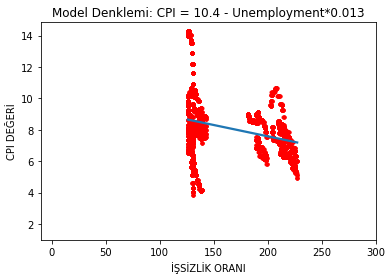

In [55]:
import matplotlib.pyplot as plt
g = sns.regplot(df["CPI"], df["Unemployment"], ci=None, scatter_kws={'color':'r', 's':10})
g.set_title("Model Denklemi: CPI = 10.4 - Unemployment*0.013")
g.set_ylabel("CPI DEĞERİ")
g.set_xlabel("İŞSİZLİK ORANI")
plt.xlim(-10,300)
plt.ylim(bottom=1);

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
X = df[["CPI"]]
y = df["Unemployment"]
reg = LinearRegression()
model = reg.fit(X,y)
model.intercept_
model.coef_
model.score(X,y)
model.predict(X)[0:10]
       

array([7.43027492, 7.42817591, 7.42749971, 7.42706065, 7.4266216 ,
       7.42618254, 7.42855789, 7.43140231, 7.43424673, 7.43709115])